In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [10]:
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 3s 1us/step


In [3]:
train_data.size

8982

In [4]:
test_data.size

2246

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Векторизация данных

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Определение модели

In [14]:
from keras import models
from keras import layers

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Проверочный набор данных

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 458us/step - loss: 2.6848 - accuracy: 0.5127 - val_loss: 1.8132 - val_accuracy: 0.6260
Epoch 2/20
7982/7982 [==============================] - 2s 286us/step - loss: 1.4709 - accuracy: 0.6986 - val_loss: 1.3138 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 2s 228us/step - loss: 1.0697 - accuracy: 0.7740 - val_loss: 1.1422 - val_accuracy: 0.7550
Epoch 4/20
7982/7982 [==============================] - 2s 207us/step - loss: 0.8368 - accuracy: 0.8244 - val_loss: 1.0102 - val_accuracy: 0.7950
Epoch 5/20
7982/7982 [==============================] - 2s 197us/step - loss: 0.6690 - accuracy: 0.8614 - val_loss: 0.9736 - val_accuracy: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 180us/step - loss: 0.5318 - accuracy: 0.8909 - val_loss: 0.8996 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 160us/step - loss

### Графики потерь и точности на этапах обучения и проверки 

In [19]:
import matplotlib.pyplot as plt

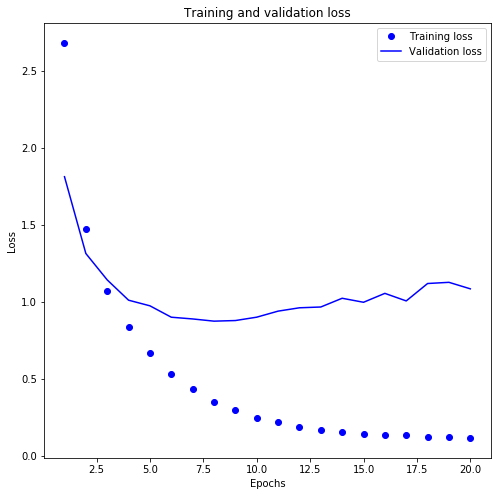

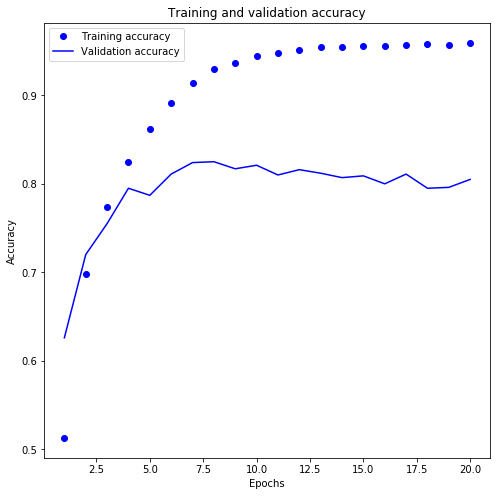

In [24]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = np.arange(1,len(loss_values)+1)

plt.figure(figsize = (8,8))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.figure(figsize = (8,8))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Модель переобучается на 9 эпохе, создадим новую модель с 9-ю эпохами обучения

In [25]:
opt_model = models.Sequential()
opt_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
opt_model.add(layers.Dense(64, activation='relu'))
opt_model.add(layers.Dense(46, activation='softmax'))

In [26]:
opt_model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
history = opt_model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 289us/step - loss: 2.6111 - accuracy: 0.4841 - val_loss: 1.7442 - val_accuracy: 0.6280
Epoch 2/9
7982/7982 [==============================] - 2s 207us/step - loss: 1.4144 - accuracy: 0.7063 - val_loss: 1.2845 - val_accuracy: 0.7150
Epoch 3/9
7982/7982 [==============================] - 1s 183us/step - loss: 1.0424 - accuracy: 0.7739 - val_loss: 1.1132 - val_accuracy: 0.7710
Epoch 4/9
7982/7982 [==============================] - 1s 175us/step - loss: 0.8188 - accuracy: 0.8249 - val_loss: 1.0086 - val_accuracy: 0.7920
Epoch 5/9
7982/7982 [==============================] - 1s 169us/step - loss: 0.6532 - accuracy: 0.8568 - val_loss: 0.9420 - val_accuracy: 0.8020
Epoch 6/9
7982/7982 [==============================] - 1s 156us/step - loss: 0.5209 - accuracy: 0.8890 - val_loss: 0.8982 - val_accuracy: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 156us/step - loss: 0.420

In [29]:
results = opt_model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 1s 325us/step


[0.9996360921477592, 0.777827262878418]

### Получение предсказаний для тестовых данных

In [30]:
predictions = opt_model.predict(x_test)

In [33]:
predictions.shape

(2246, 46)

In [34]:
np.sum(predictions[0])

0.9999999

### элементы predictions вероятности pi того, что данный объект  классу i

### Пример модели с слишком малым промежуточным слоем, на котором будет происходить потеря информации:

In [35]:
bad_model = models.Sequential()
bad_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
bad_model.add(layers.Dense(4, activation='relu'))
bad_model.add(layers.Dense(46, activation='softmax'))

In [36]:
bad_model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [37]:
bad_model.fit(partial_x_train,
              partial_y_train,
              epochs=20,
              batch_size=512,
              validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 292us/step - loss: 3.4892 - accuracy: 0.2035 - val_loss: 3.1074 - val_accuracy: 0.2610
Epoch 2/20
7982/7982 [==============================] - 2s 206us/step - loss: 2.8814 - accuracy: 0.2791 - val_loss: 2.6523 - val_accuracy: 0.3010
Epoch 3/20
7982/7982 [==============================] - 2s 194us/step - loss: 2.4334 - accuracy: 0.3158 - val_loss: 2.2633 - val_accuracy: 0.4190
Epoch 4/20
7982/7982 [==============================] - 1s 178us/step - loss: 2.0191 - accuracy: 0.5639 - val_loss: 1.9267 - val_accuracy: 0.6320
Epoch 5/20
7982/7982 [==============================] - 1s 166us/step - loss: 1.6748 - accuracy: 0.6639 - val_loss: 1.6827 - val_accuracy: 0.6560
Epoch 6/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.4425 - accuracy: 0.6868 - val_loss: 1.5463 - val_accuracy: 0.6580
Epoch 7/20
7982/7982 [==============================] - 1s 168us/step - loss

In [38]:
results = bad_model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 1s 347us/step


[1.4917222145722577, 0.6865538954734802]

#### Потеря точности ~11%